## Trabajo Práctico 3 con escenario ssp1 2.6

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth
import metpy

In [5]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP3/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

In [6]:
def map_adv(dato,clevels,titulo,variable,unidades):
    
    fig = plt.figure(figsize=(8, 10))
    lat = tas.lat
    lon = tas.lon
    #x, y, u, v, vector_crs = vientos(shape=(len(lon),len(lat)))

    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    plt.title(str(titulo))
    ax.coastlines('50m')
    ax.set_extent([-180,180, -90, 90], ccrs.PlateCarree())
    
    clevels = clevels
    im1=ax.contourf(lon, lat, dato,clevels,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both') 
    
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, linestyle='-')
    #ax.quiver(lon,lat, u_h1 - u_h2, v_h1 - v_h2, transform=ccrs.PlateCarree(), regrid_shape=15)
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    colorbar_axes = fig.add_axes([first_plot_left + .8, bottom1, 0.02, 1*height])
    cbar = plt.colorbar(im1, colorbar_axes, fraction=0.05, pad=0.04,aspect=18, orientation='vertical')
    #ticklabs = cbar.ax.get_yticklabels()
    #cbar.ax.set_yticklabels(ticklabs, fontsize=16)
    cbar.set_label(str(variable)+' ['+str(unidades)+']',fontsize=16)

    plt.show()

In [34]:
#Abro CanESM5 historico
tas = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')
#Abro CanESM5 viento horizonte 1
tas_h1 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp126_ensmeani1p1f1_2020-2049_2.5.nc')
#Abro CanESM5 viento horizonte 2
tas_h2 = xr.open_dataset(path2+'CanESM5/tas_Amon_CanESM5_ssp126_ensmeani1p1f1_2070-2099_2.5.nc')

#Paso a celcius
tas_attrs = tas.tas.attrs 
t = tas.tas - 273.15
tas['tas'] = t
tas['tas'].attrs = tas_attrs
t_h1 = tas_h1.tas - 273.15
tas_h1['tas'] = t_h1
tas_h1['tas'].attrs = tas_attrs
t_h2 = tas_h2.tas - 273.15
tas_h2['tas'] = t_h2
tas_h2['tas'].attrs = tas_attrs

#Cambio longitudes
lon = np.arange(0,360, 362/144)
lon_attrs = tas.lon.attrs
tas['lon'] = lon
tas['lon'].attrs = lon_attrs
tas_h1['lon'] = lon
tas_h1['lon'].attrs = lon_attrs
tas_h2['lon'] = lon
tas_h2['lon'].attrs = lon_attrs
lat = tas.lat
lon = tas.lon

huss = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc')

huss_h1 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp126_r1i1p1f1_2020-2049_2.5.nc')

huss_h2 = xr.open_dataset(path2+'CanESM5/huss_Amon_CanESM5_ssp126_r1i1p1f1_2070-2099_2.5.nc')

#Cambio longitudes
huss['lon'] = lon
huss['lon'].attrs = lon_attrs
huss_h1['lon'] = lon
huss_h1['lon'].attrs = lon_attrs
huss_h2['lon'] = lon
huss_h2['lon'].attrs = lon_attrs

#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM5 historico
u850 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc').sel(plev=85000)
v850 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_historical_ensmeani1p1f1_2.5.nc').sel(plev=85000)

#Abro CanESM5 viento horizonte 1
u850_h1 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp126_r1i1p2f1_2020-2049_2.5.nc').sel(plev=85000)
v850_h1 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp126_r1i1p2f1_2020-2049_2.5.nc').sel(plev=85000)

#Abro CanESM5 viento horizonte 2
u850_h2 = xr.open_dataset(path2+'CanESM5/ua850_Amon_CanESM5_ssp126_r1i1p2f1_2070-2099_2.5.nc').sel(plev=85000)
v850_h2 = xr.open_dataset(path2+'CanESM5/va850_Amon_CanESM5_ssp126_r1i1p2f1_2070-2099_2.5.nc').sel(plev=85000)

lon = np.arange(0,360, 362/144)
lon_attrs = u850.lon.attrs
u850['lon'] = lon
u850['lon'].attrs = lon_attrs
v850['lon'] = lon
v850['lon'].attrs = lon_attrs
u850_h1['lon'] = lon
u850_h1['lon'].attrs = lon_attrs
v850_h1['lon'] = lon
v850_h1['lon'].attrs = lon_attrs
u850_h2['lon'] = lon
u850_h2['lon'].attrs = lon_attrs
v850_h2['lon'] = lon
v850_h2['lon'].attrs = lon_attrs


#Abro CanESM5 historico
evspsbl = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_historical_ensmeani1p1f1_2.5_anu.nc')
#Abro CanESM5 viento horizonte 1
evspsbl_h1 = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_ssp126_ensmeani1p1f1_2020-2049_2.5_anu.nc')
#Abro CanESM5 viento horizonte 2
evspsbl_h2 = xr.open_dataset(path2+'CanESM5/etp_Amon_CanESM5_ssp126_ensmeani1p1f1_2070-2099_2.5_anu.nc')

evspsbl['lon'] = lon
evspsbl['lon'].attrs = lon_attrs
evspsbl_h1['lon'] = lon
evspsbl_h1['lon'].attrs = lon_attrs
evspsbl_h2['lon'] = lon
evspsbl_h2['lon'].attrs = lon_attrs

#Genero variable de unos
unos = huss.huss / huss.huss

#Genero datos para cada horizonte
variables_historical = tas.assign(huss = huss.huss)
variables_h1 = tas_h1.assign(huss = huss_h1.huss)
variables_h2 = tas_h2.assign(huss = huss_h2.huss)

variables_historical = variables_historical.assign(unos = unos)
variables_h1 = variables_h1.assign(unos = huss_h1.huss / huss_h1.huss)
variables_h2 = variables_h2.assign(unos = huss_h2.huss / huss_h2.huss)

variables_historical = variables_historical.assign(ua = u850.ua)
variables_historical = variables_historical.assign(va = v850.va)
variables_h1 = variables_h1.assign(ua = u850_h1.ua)
variables_h1 = variables_h1.assign(va = v850_h1.va)
variables_h2 = variables_h2.assign(ua = u850_h2.ua)
variables_h2 = variables_h2.assign(va = v850_h2.va)

variables_historical = variables_historical.assign(evspsbl = evspsbl.etp)
variables_h1 = variables_h1.assign(evspsbl = evspsbl_h1.etp)
variables_h2 = variables_h2.assign(evspsbl = evspsbl_h2.etp)

In [8]:
# Calculo el calor sensible y latente y calculo la entalpia
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Ha_hist_clim = Ha_hist.mean(dim='time')
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)
Hv_hist_clim = Hv_hist.mean(dim='time')
H_hist = Ha_hist + Hv_hist
H_hist_clim = H_hist.mean(dim='time')

Ha_h1 = (1.007*variables_h1.tas - 0.026*variables_h1.unos)
Ha_h1_clim = Ha_h1.mean(dim='time')
Hv_h1 = variables_h1.huss*(2502 - 0.538*variables_h1.tas)
Hv_h1_clim = Hv_h1.mean(dim='time')
H_h1 = Ha_h1 + Hv_h1
H_h1_clim = H_h1.mean(dim='time')

Ha_h2 = (1.007*variables_h2.tas - 0.026*variables_h2.unos)
Ha_h2_clim = Ha_h2.mean(dim='time')
Hv_h2 = variables_h2.huss*(2502 - 0.538*variables_h2.tas)
Hv_h2_clim = Hv_h2.mean(dim='time')
H_h2 = Ha_h2 + Hv_h2
H_h2_clim = H_h2.mean(dim='time')

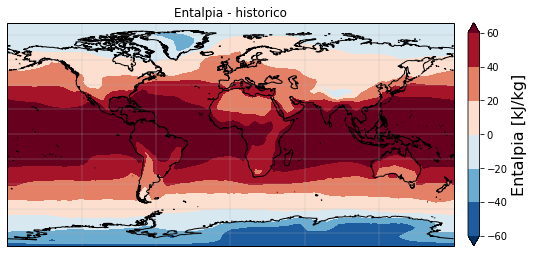

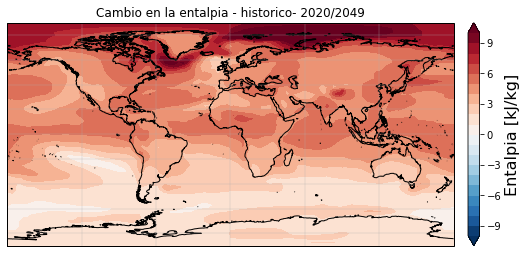

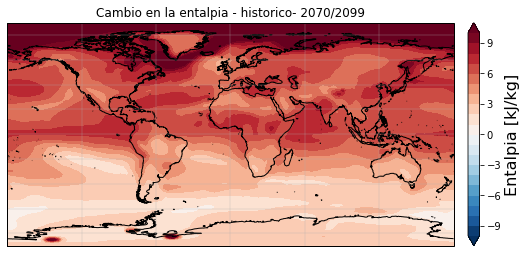

In [28]:
titulo = 'Entalpia - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en la entalpia - historico- 2020/2049'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_h1_clim-H_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en la entalpia - historico- 2070/2099'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(H_h2_clim-H_hist_clim,clevels,titulo,variable,unidades)

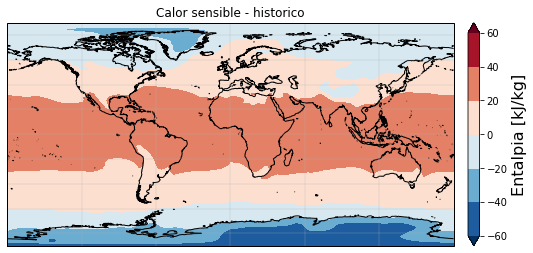

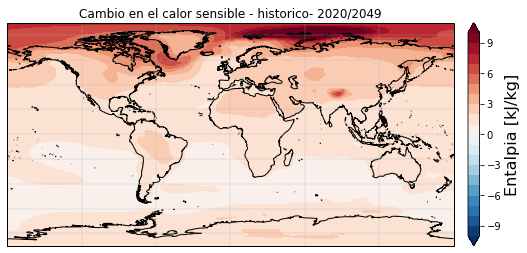

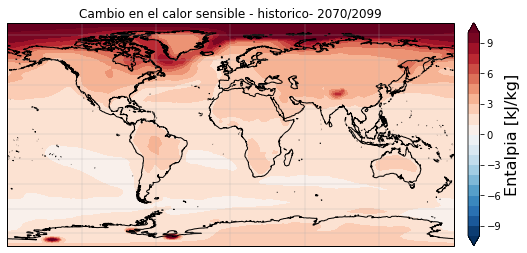

In [10]:
titulo = 'Calor sensible - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor sensible - historico- 2020/2049'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_h1_clim-Ha_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor sensible - historico- 2070/2099'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Ha_h2_clim-Ha_hist_clim,clevels,titulo,variable,unidades)

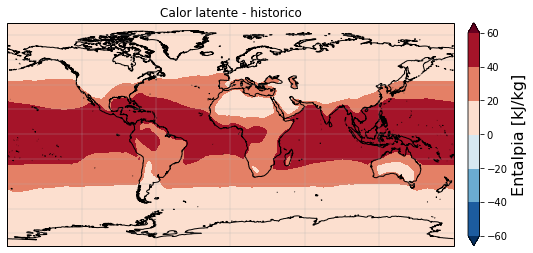

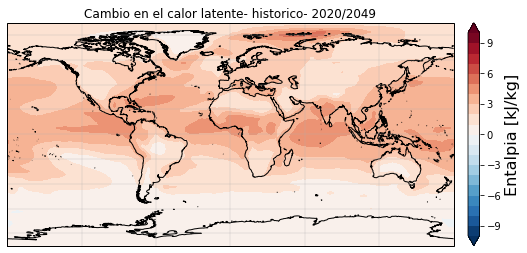

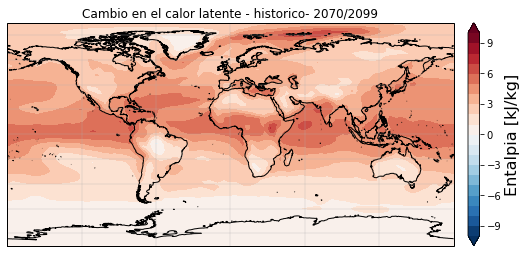

In [11]:
titulo = 'Calor latente - historico'
clevels = np.arange(-60,80,20)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor latente- historico- 2020/2049'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_h1_clim-Hv_hist_clim,clevels,titulo,variable,unidades)

titulo = 'Cambio en el calor latente - historico- 2070/2099'
clevels = np.arange(-10,11,1)
variable = 'Entalpia'
unidades = 'kJ/kg'
map_adv(Hv_h2_clim-Hv_hist_clim,clevels,titulo,variable,unidades)

In [35]:
Rt = evspsbl.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt = (Rt/30)/86400
Rt_h1 = evspsbl_h1.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt_h1 = (Rt_h1/30)/86400
Rt_h2 = evspsbl_h2.etp*2261.3 #/8640 #Convierto a kg/m**2/s*L
Rt_h2 = (Rt_h2/30)/86400

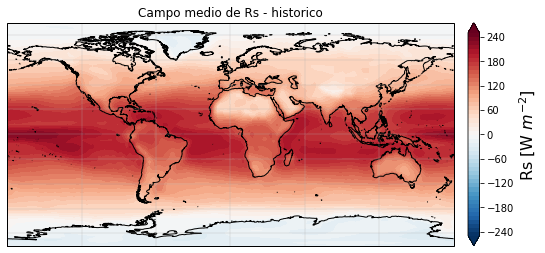

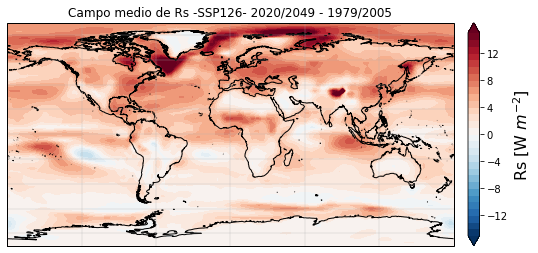

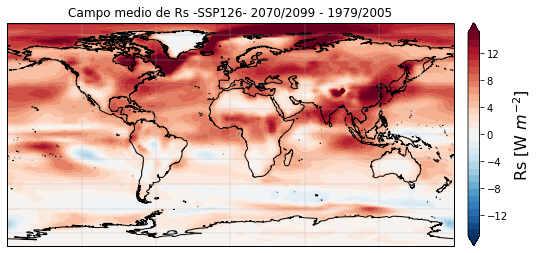

In [42]:
titulo = 'Campo medio de Rs - historico'
clevels = np.arange(-250,260,10)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv(Rt.mean(dim='time')*100,clevels,titulo,variable,unidades)

titulo = 'Campo medio de Rs -SSP126- 2020/2049 - 1979/2005'
clevels = np.arange(-15,16,1)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv((Rt_h1.mean(dim='time')- Rt.mean(dim='time'))*100,clevels,titulo,variable,unidades)

titulo = 'Campo medio de Rs -SSP126- 2070/2099 - 1979/2005'
clevels = np.arange(-15,16,1)
variable = 'Rs'
unidades = 'W $m^{-2}$'
map_adv((Rt_h2.mean(dim='time')- Rt.mean(dim='time'))*100,clevels,titulo,variable,unidades)

## Analisis del cambio en la T y q

In [14]:
HN_tas = variables_historical.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss = variables_historical.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas = variables_historical.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss = variables_historical.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_clim = variables_historical.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HN_huss_clim = variables_historical.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HS_tas_clim = variables_historical.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')
HS_huss_clim = variables_historical.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean(dim='time')

HN_tas_h1 = variables_h1.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss_h1 = variables_h1.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas_h1 = variables_h1.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss_h1 = variables_h1.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_h2 = variables_h2.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HN_huss_h2 = variables_h2.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat')
HS_tas_h2 = variables_h2.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')
HS_huss_h2 = variables_h2.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat')

HN_tas_h1_c = variables_h1.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HN_huss_h1_c = variables_h1.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_tas_h1_c = variables_h1.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_huss_h1_c = variables_h1.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")

HN_tas_h2_c = variables_h2.tas.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HN_huss_h2_c = variables_h2.huss.sel(lat=slice(0,90)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_tas_h2_c = variables_h2.tas.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")
HS_huss_h2_c = variables_h2.huss.sel(lat=slice(-90,0)).mean(dim='lon').mean(dim='lat').groupby("time.month").mean("time")


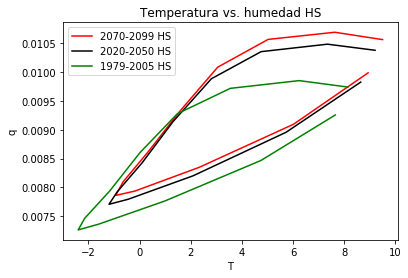

In [15]:
plt.plot(HS_tas_h2_c,HS_huss_h2_c,'r',label='2070-2099 HS')
plt.plot(HS_tas_h1_c,HS_huss_h1_c,'k',label='2020-2050 HS')
plt.plot(HS_tas_clim,HS_huss_clim,'g',label='1979-2005 HS')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HS')
plt.legend()

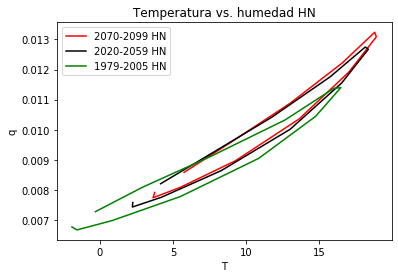

In [16]:
plt.plot(HN_tas_h2_c,HN_huss_h2_c,'r',label='2070-2099 HN')
plt.plot(HN_tas_h1_c,HN_huss_h1_c,'k',label='2020-2059 HN')
plt.plot(HN_tas_clim,HN_huss_clim,'g',label='1979-2005 HN')
plt.xlabel('T')
plt.ylabel('q')
plt.title('Temperatura vs. humedad HN')
plt.legend()

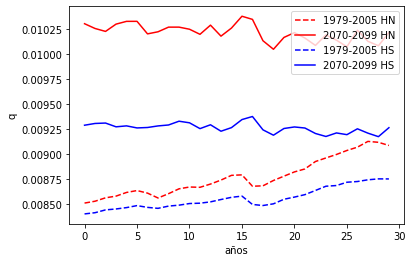

In [17]:
plt.plot(HN_huss.groupby("time.year").mean(dim='time'),'--r',label='1979-2005 HN')
plt.plot(HN_huss_h2.groupby("time.year").mean(dim='time'),'r',label='2070-2099 HN')
tendencia_huss_HN = (HN_huss.groupby("time.year").mean(dim='time')[-1] - HN_huss.groupby("time.year").mean(dim='time')[-1])/30

plt.plot(HS_huss.groupby("time.year").mean(dim='time'),'--b',label='1979-2005 HS')
plt.plot(HS_huss_h2.groupby("time.year").mean(dim='time'),'b',label='2070-2099 HS')
tendencia_huss_HS = (HS_huss.groupby("time.year").mean(dim='time')[-1] - HS_huss.groupby("time.year").mean(dim='time')[-1])/30
plt.xlabel('años')
plt.ylabel('q')
plt.legend()

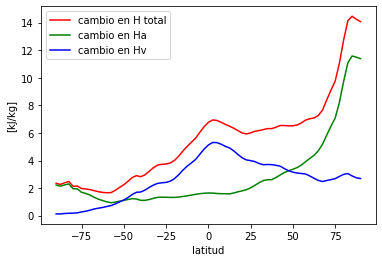

In [18]:
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)
Ha_h2 = (1.007*variables_h2.tas - 0.026*variables_h2.unos)
Hv_h2 = variables_h2.huss*(2502 - 0.538*variables_h2.tas)
H_hist = (Ha_hist + Hv_hist).mean(dim='time')
H_h2 = (Ha_h2 + Hv_h2).mean(dim='time')

H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')
lat = H_cambio.lat
plt.plot(lat,H_cambio,'r',label='cambio en H total')
plt.plot(lat,Ha_cambio,'g',label='cambio en Ha')
plt.plot(lat,Hv_cambio,'b',label='cambio en Hv')
plt.xlabel('latitud')
plt.ylabel('[kJ/kg]')
plt.legend()

In [19]:
H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')

T_porcentaje = Ha_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
q_porcentaje = Hv_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
T_porcentaje = Ha_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
q_porcentaje_HN = Hv_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
T_porcentaje_HS = Ha_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')
q_porcentaje_HS = Hv_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')

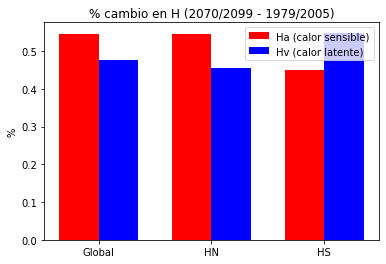

In [20]:

labels = ['Global', 'HN', 'HS']
T_percent = [T_porcentaje.values, T_porcentaje.values, T_porcentaje_HS.values]
q_percent = [q_porcentaje.values,q_porcentaje_HN.values,q_porcentaje_HS.values]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T_percent, width, label='Ha (calor sensible)',color='r')
rects2 = ax.bar(x + width/2, q_percent, width, label='Hv (calor latente)',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% cambio en H (2070/2099 - 1979/2005)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [21]:
H_hist = (Ha_hist + Hv_hist)
H_h2 = (Ha_h2 + Hv_h2)

H_cambio_anu_HN = (H_h2.groupby('time.month').mean(dim='time') - H_hist.groupby('time.month').mean(dim='time')).sel(lat=(0,90)).mean(dim='lat').mean(dim='lon')
H_cambio_anu_HS = (H_h2.groupby('time.month').mean(dim='time') - H_hist.groupby('time.month').mean(dim='time')).sel(lat=(-90,0)).mean(dim='lat').mean(dim='lon')


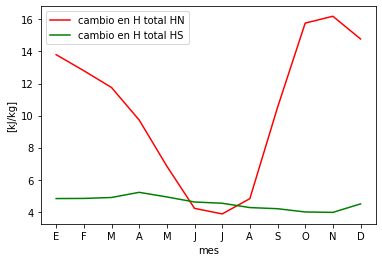

In [22]:
labels = ['E','F','M','A','M','J','J','A','S','O','N','D']
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.plot(H_cambio_anu_HN,'r',label='cambio en H total HN')
ax.plot(H_cambio_anu_HS,'g',label='cambio en H total HS')
#ax.plot(Ha_cambio_anu_HN,'g',label='cambio en Ha')
#ax.plot(Hv_cambio_anu_HN,'b',label='cambio en Hv')
plt.xlabel('mes')
plt.ylabel('[kJ/kg]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()

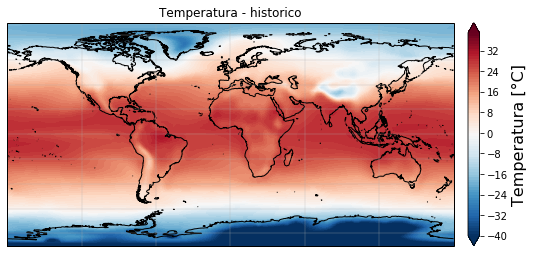

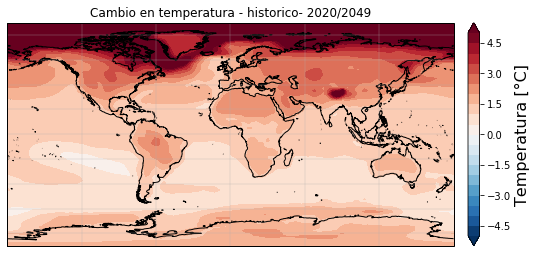

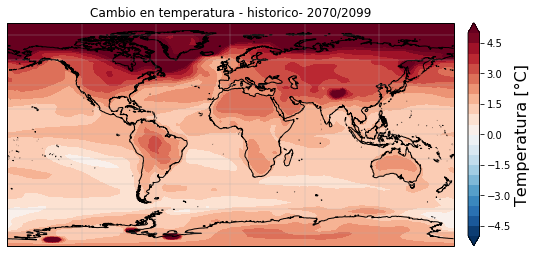

In [23]:
titulo = 'Temperatura - historico'
clevels = np.arange(-40,40,1)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en temperatura - historico- 2020/2049'
clevels = np.arange(-5,5.5,.5)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_h1.tas.mean(dim='time')-variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en temperatura - historico- 2070/2099'
clevels = np.arange(-5,5.5,.5)
variable = 'Temperatura'
unidades = '°C'
map_adv(variables_h2.tas.mean(dim='time')-variables_historical.tas.mean(dim='time'),clevels,titulo,variable,unidades)

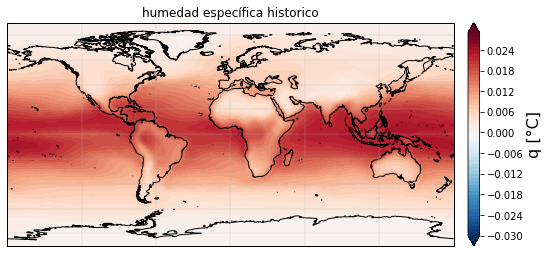

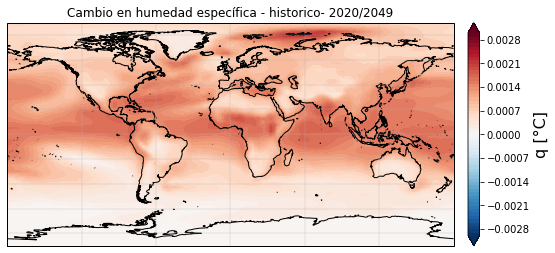

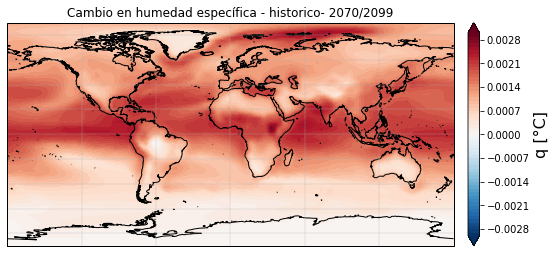

In [24]:
titulo = 'humedad específica historico'
clevels = np.arange(-.03,.03,.001)
variable = 'q'
unidades = '°C'
map_adv(variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en humedad específica - historico- 2020/2049'
clevels = np.arange(-.003,.0031,.0001)
variable = 'q'
unidades = '°C'
map_adv(variables_h1.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

titulo = 'Cambio en humedad específica - historico- 2070/2099'
clevels = np.arange(-.003,.0031,.0001)
variable = 'q'
unidades = '°C'
map_adv(variables_h2.huss.mean(dim='time')-variables_historical.huss.mean(dim='time'),clevels,titulo,variable,unidades)

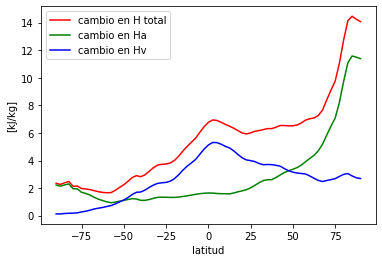

In [25]:
Ha_hist = (1.007*variables_historical.tas - 0.026*variables_historical.unos)
Hv_hist = variables_historical.huss*(2502 - 0.538*variables_historical.tas)
Ha_h2 = (1.007*variables_h2.tas - 0.026*variables_h2.unos)
Hv_h2 = variables_h2.huss*(2502 - 0.538*variables_h2.tas)
H_hist = (Ha_hist + Hv_hist).mean(dim='time')
H_h2 = (Ha_h2 + Hv_h2).mean(dim='time')

H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')
lat = H_cambio.lat
plt.plot(lat,H_cambio,'r',label='cambio en H total')
plt.plot(lat,Ha_cambio,'g',label='cambio en Ha')
plt.plot(lat,Hv_cambio,'b',label='cambio en Hv')
plt.xlabel('latitud')
plt.ylabel('[kJ/kg]')
plt.legend()

In [26]:
H_cambio = (H_h2 - H_hist).mean(dim='lon')
Ha_cambio = (Ha_h2.mean(dim='time') - Ha_hist.mean(dim='time')).mean(dim='lon')
Hv_cambio = (Hv_h2.mean(dim='time') - Hv_hist.mean(dim='time')).mean(dim='lon')

T_porcentaje = Ha_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
q_porcentaje = Hv_cambio.mean(dim='lat')/H_cambio.mean(dim='lat')
T_porcentaje = Ha_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
q_porcentaje_HN = Hv_cambio.sel(lat=slice(0,90)).mean(dim='lat')/H_cambio.sel(lat=slice(0,90)).mean(dim='lat')
T_porcentaje_HS = Ha_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')
q_porcentaje_HS = Hv_cambio.sel(lat=slice(-90,0)).mean(dim='lat')/H_cambio.sel(lat=slice(-90,0)).mean(dim='lat')

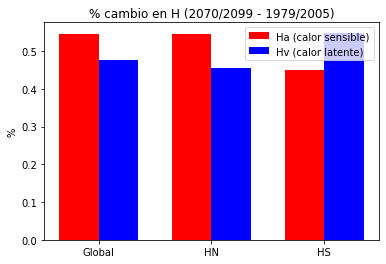

In [27]:

labels = ['Global', 'HN', 'HS']
T_percent = [T_porcentaje.values, T_porcentaje.values, T_porcentaje_HS.values]
q_percent = [q_porcentaje.values,q_porcentaje_HN.values,q_porcentaje_HS.values]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T_percent, width, label='Ha (calor sensible)',color='r')
rects2 = ax.bar(x + width/2, q_percent, width, label='Hv (calor latente)',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% cambio en H (2070/2099 - 1979/2005)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()